# Notebook for the AAA course
## **Authors**: BRETECHE Youenn & YAKOUBOV Anas
## Presentation
This notebook is a part of the AAA course. The goal is to predict the price of houses in Melbourne using a dataset from Kaggle. We will use a Linear Regression model to predict the price of the houses. Thanks to the dataset, we have several features that can be used to predict the price of the houses. We will use these features to train the model and evaluate it.

This notebook is divided into several parts in order to follow the steps needed before training the model.

For the moment, this notebook is only cleaning the data and trying to apply a Linear Regression model to the data. The next steps will be to try different models and compare them to see which one is the best for this dataset.


### Imports

In [995]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### Load the dataset

In [996]:
df = pd.read_csv("dataset.csv")
print(f"Dataset size: {df.shape}")

Dataset size: (13580, 21)


### Columns description
**Rooms**: Number of rooms

**Price**: Price in dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Type**: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**SellerG**: Real Estate Agent

**Date**: Date sold

**Distance**: Distance from CBD

**Regionname**: General Region (West, North West, North, North east …etc)

**Propertycount**: Number of properties that exist in the suburb.

**Bedroom2**: Scraped # of Bedrooms (from different source)

**Bathroom**: Number of Bathrooms

**Car**: Number of carspots

**Landsize**: Land Size

**BuildingArea**: Building Size

**CouncilArea**: Governing council for the area

In [997]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [998]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [999]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


#### Numerical features

In [1000]:
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.to_list()
numerical_features

['Rooms',
 'Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

#### Categorical features

In [1001]:
categorical_features = df.select_dtypes(include=["object"]).columns.to_list()
categorical_features

['Suburb',
 'Address',
 'Type',
 'Method',
 'SellerG',
 'Date',
 'CouncilArea',
 'Regionname']

### Data preprocessing
We check all the columns for missing values

In [1002]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

We can see that columns "Car", "BuildingArea", "YearBuilt" and "CouncilArea" have missing values.

In [1003]:
df["BuildingArea"].isna().mean() * 100

np.float64(47.49631811487481)

In [1004]:
df["YearBuilt"].isna().mean() * 100

np.float64(39.58026509572901)

In [1005]:
df["CouncilArea"].isna().mean() * 100

np.float64(10.08100147275405)

In [1006]:
df["Car"].isna().mean() * 100

np.float64(0.45655375552282773)

We can see that the "BuildingArea", "YearBuilt" and "CouncilArea" columns have respectively 47.5%, 39.6% and 10.1% of missing values. We will remove those columns since they have too many missing values. In the case of the "Car" column, we will use the most frequent value to fill the missing values.

In [1007]:
df = df.drop(columns=["BuildingArea", "YearBuilt", "CouncilArea"])

numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.to_list()
categorical_features = df.select_dtypes(include=["object"]).columns.to_list()

df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,-37.8072,144.9941,Northern Metropolitan,4019.0


In [1008]:
df["Car"].value_counts()

Car
2.0     5591
1.0     5509
0.0     1026
3.0      748
4.0      506
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: count, dtype: int64

In [1009]:
df["Car"] = df["Car"].fillna(df["Car"].mode()[0])

df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

### Data visualization

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Distance'}>],
       [<Axes: title={'center': 'Postcode'}>,
        <Axes: title={'center': 'Bedroom2'}>,
        <Axes: title={'center': 'Bathroom'}>],
       [<Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>,
        <Axes: title={'center': 'Lattitude'}>],
       [<Axes: title={'center': 'Longtitude'}>,
        <Axes: title={'center': 'Propertycount'}>, <Axes: >]],
      dtype=object)

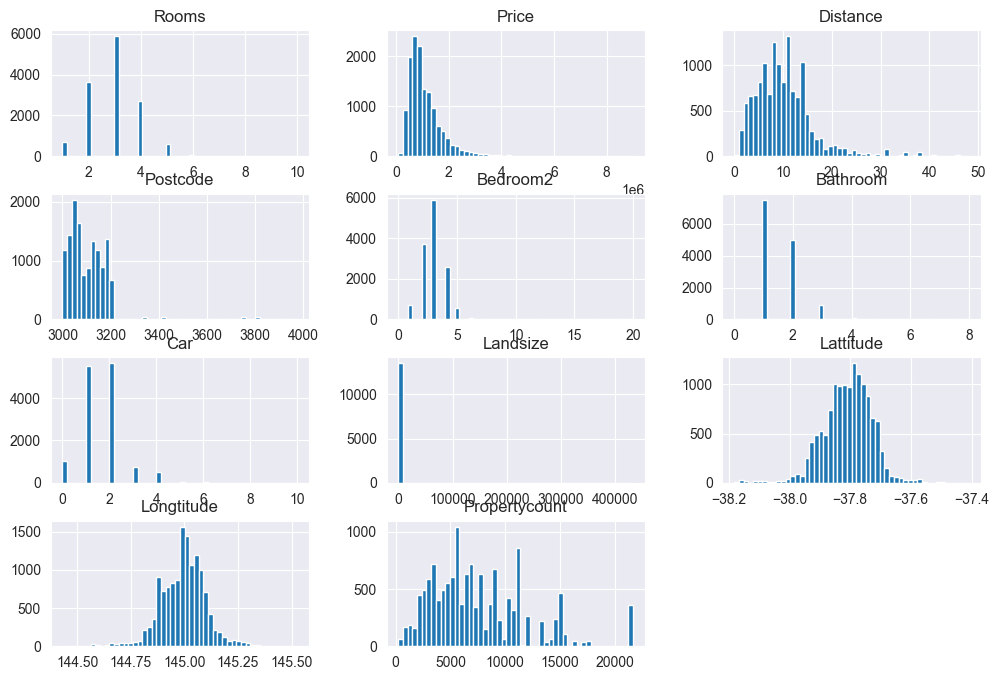

In [1010]:
df.hist(bins=50, figsize=(12, 8))

In [1011]:
df["Landsize"].describe()

count     13580.000000
mean        558.416127
std        3990.669241
min           0.000000
25%         177.000000
50%         440.000000
75%         651.000000
max      433014.000000
Name: Landsize, dtype: float64

It seems that the "Landsize" column has some outliers. We will remove the column because it has too many values that are too high compared to the rest of the data. It could affect the model's performance.

In [1012]:
numerical_features.remove("Landsize")
numerical_features

['Rooms',
 'Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Lattitude',
 'Longtitude',
 'Propertycount']

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Distance'}>],
       [<Axes: title={'center': 'Postcode'}>,
        <Axes: title={'center': 'Bedroom2'}>,
        <Axes: title={'center': 'Bathroom'}>],
       [<Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>,
        <Axes: title={'center': 'Lattitude'}>],
       [<Axes: title={'center': 'Longtitude'}>,
        <Axes: title={'center': 'Propertycount'}>, <Axes: >]],
      dtype=object)

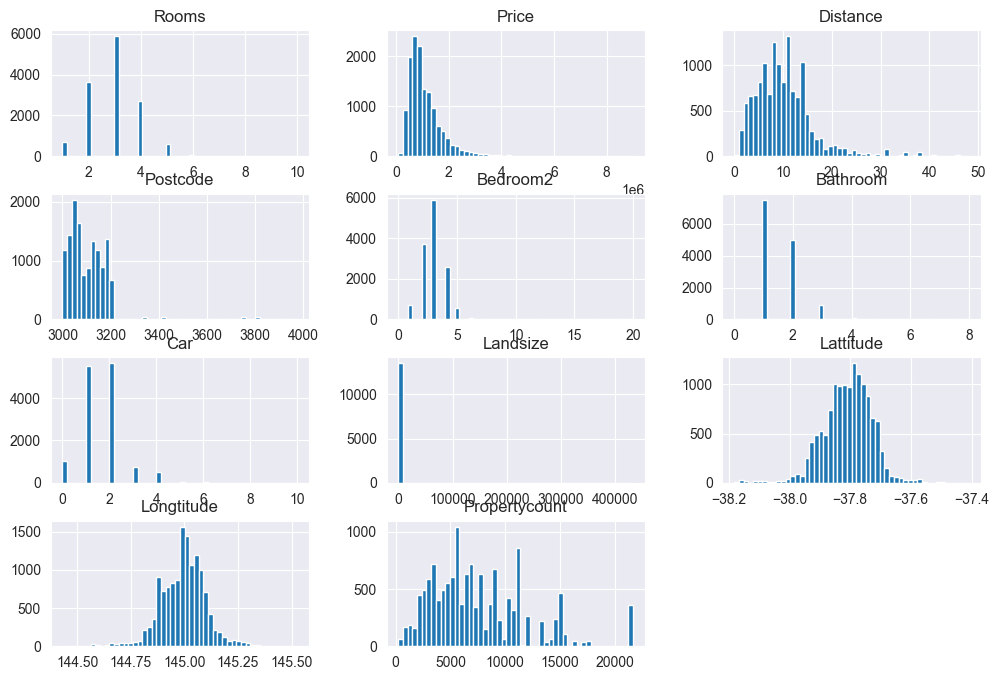

In [1013]:
df.hist(bins=50, figsize=(12, 8))

#### Let's visualize the correlation matrix using a heatmap

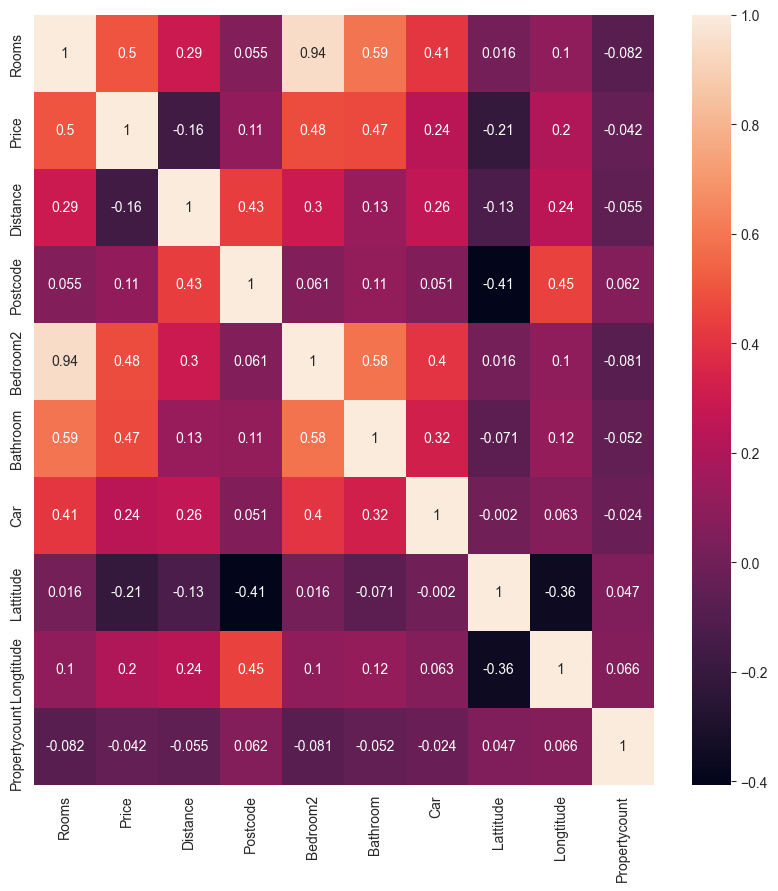

In [1014]:
plt.figure(figsize=(10, 10))


sns.heatmap(df[numerical_features].corr(), annot=True)
plt.show()

We can see that Rooms and Bedroom2 are highly correlated. But also that Propertycount and Distance are negatively correlated with Price, so they might be good predictors. We can also see that Price is highly correlated with Rooms and Bedroom2 which makes sense since the more rooms a house has the more expensive it is.


Let's also visualize the scatter matrix of the numerical features.
It will help us see the distribution of the data.

array([[<Axes: xlabel='Rooms', ylabel='Rooms'>,
        <Axes: xlabel='Price', ylabel='Rooms'>,
        <Axes: xlabel='Distance', ylabel='Rooms'>,
        <Axes: xlabel='Postcode', ylabel='Rooms'>,
        <Axes: xlabel='Bedroom2', ylabel='Rooms'>,
        <Axes: xlabel='Bathroom', ylabel='Rooms'>,
        <Axes: xlabel='Car', ylabel='Rooms'>,
        <Axes: xlabel='Lattitude', ylabel='Rooms'>,
        <Axes: xlabel='Longtitude', ylabel='Rooms'>,
        <Axes: xlabel='Propertycount', ylabel='Rooms'>],
       [<Axes: xlabel='Rooms', ylabel='Price'>,
        <Axes: xlabel='Price', ylabel='Price'>,
        <Axes: xlabel='Distance', ylabel='Price'>,
        <Axes: xlabel='Postcode', ylabel='Price'>,
        <Axes: xlabel='Bedroom2', ylabel='Price'>,
        <Axes: xlabel='Bathroom', ylabel='Price'>,
        <Axes: xlabel='Car', ylabel='Price'>,
        <Axes: xlabel='Lattitude', ylabel='Price'>,
        <Axes: xlabel='Longtitude', ylabel='Price'>,
        <Axes: xlabel='Propertycount', yl

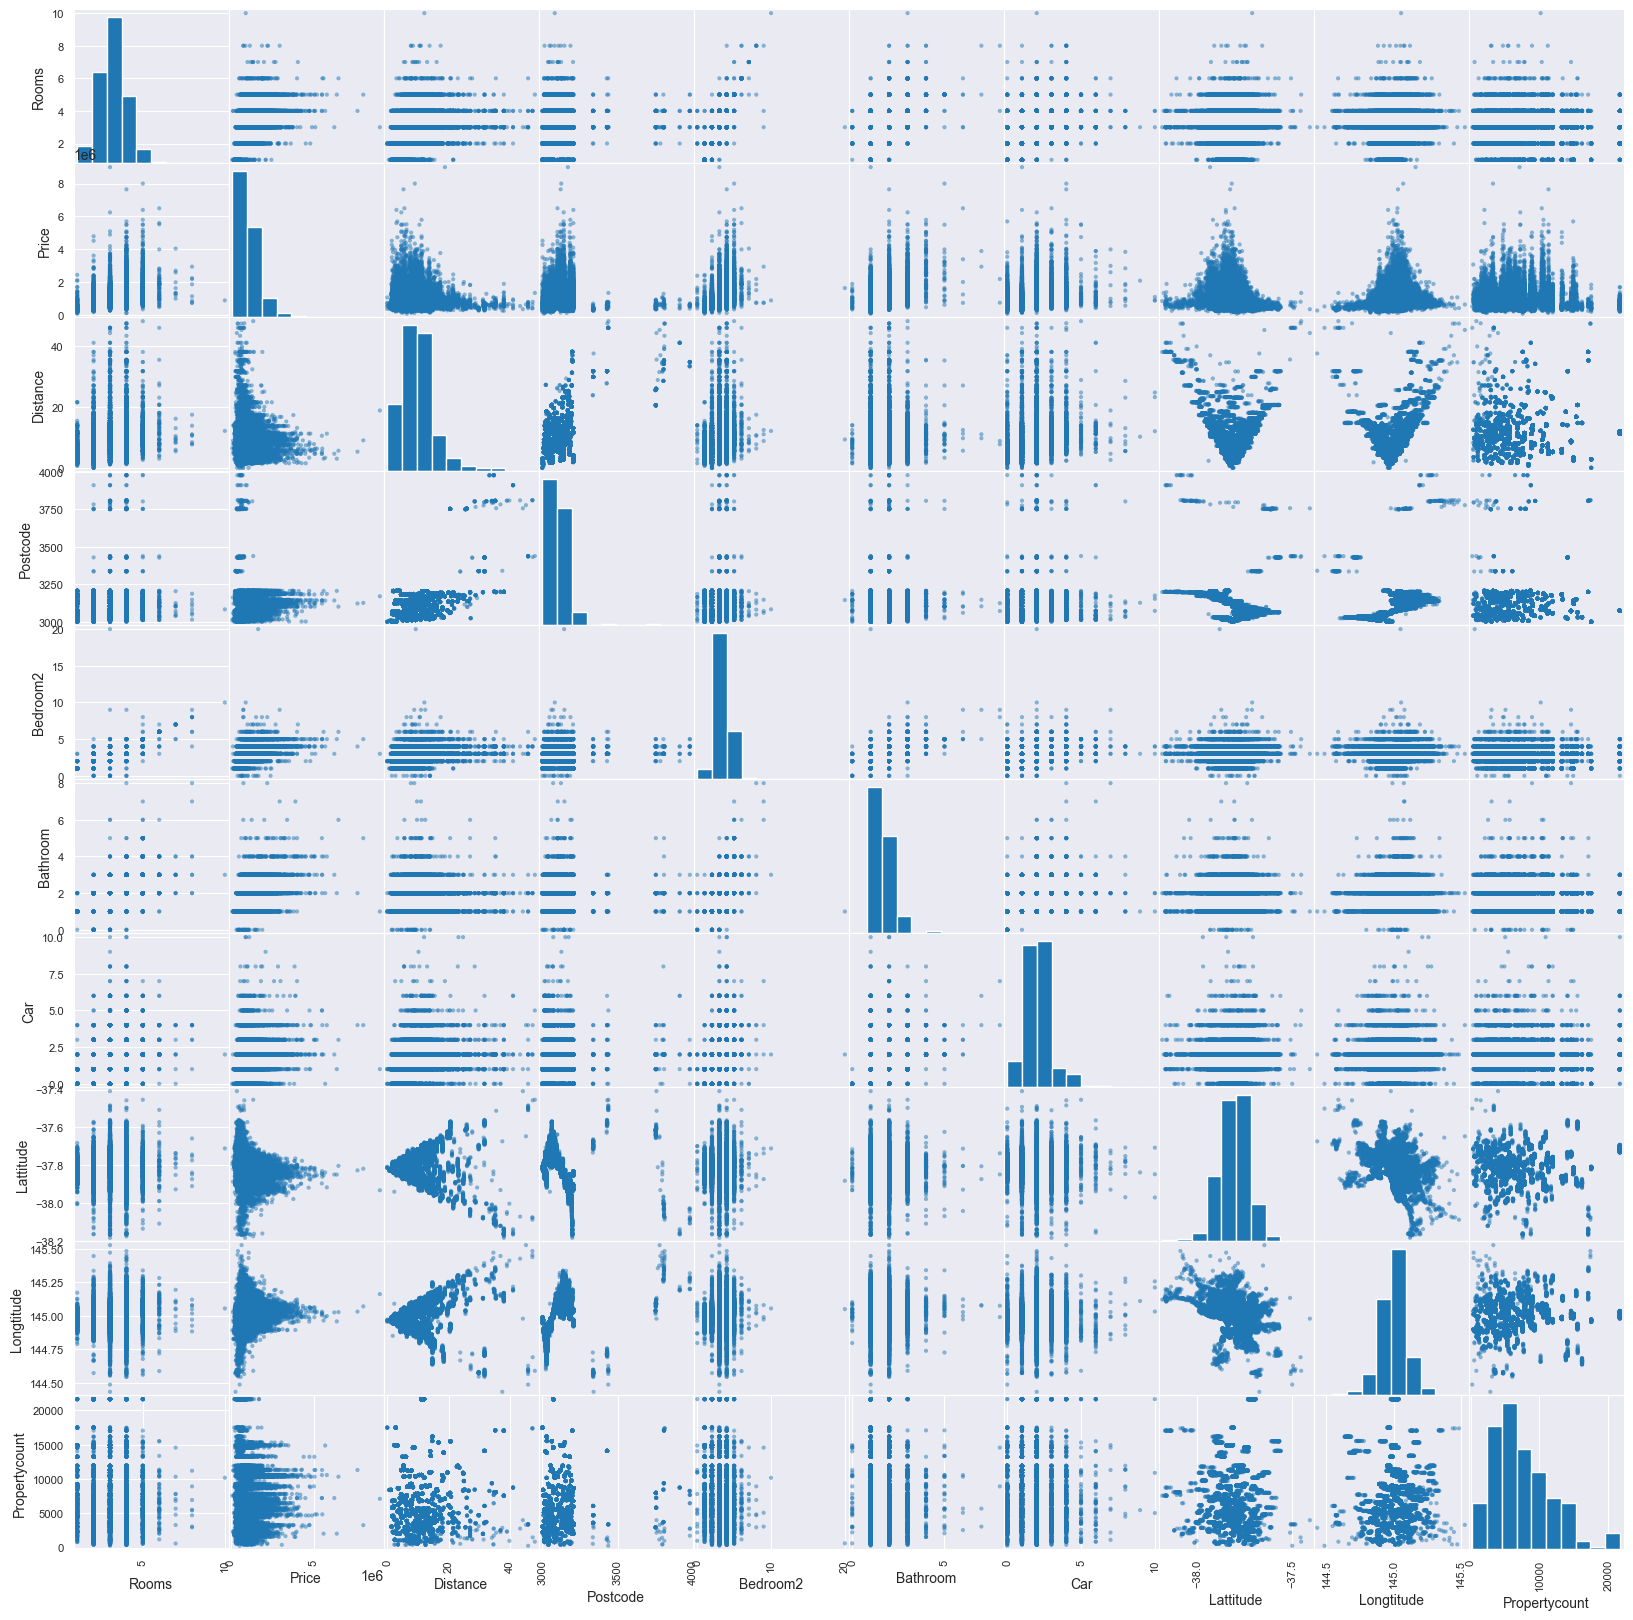

In [1015]:
scatter_matrix(df[numerical_features], figsize=(20, 20))

We can see the same results as before, Rooms and Bedroom2 are highly correlated, and Propertycount and Distance are negatively correlated with Price. We can also see that Landsize has a long tail distribution, which means that there are some outliers in the data.

<Axes: xlabel='Longtitude', ylabel='Lattitude'>

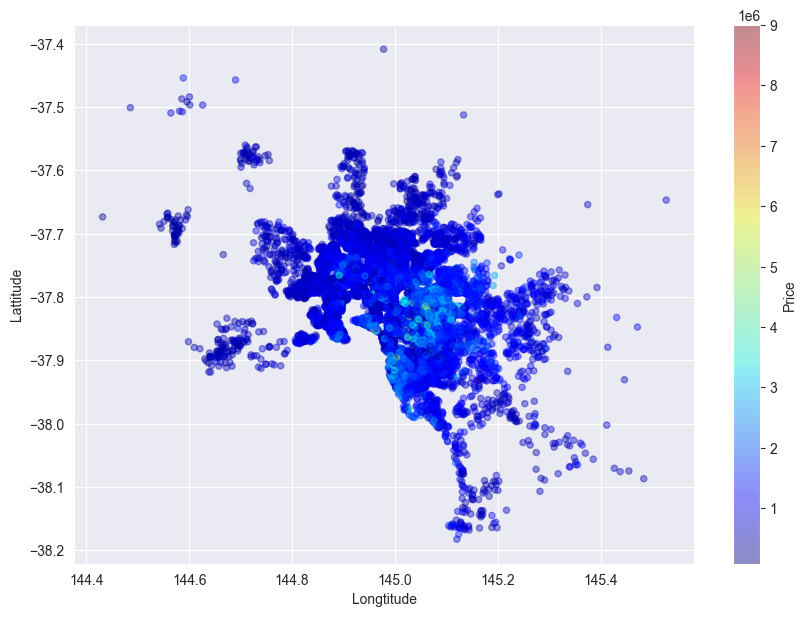

In [1016]:
df.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=0.4, figsize=(10, 7), c="Price", cmap=plt.get_cmap("jet"), colorbar=True)

In [1017]:
# numerical_features.remove("Lattitude")
# numerical_features.remove("Longtitude")
numerical_features.remove("Propertycount")
# numerical_features.remove("Distance")
numerical_features.remove("Postcode")
numerical_features

['Rooms',
 'Price',
 'Distance',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Lattitude',
 'Longtitude']

## Conclusion
Now that our data are cleaned, we can start applying transformations to them and train the model.
This will be done later in the following steps of the notebook.

## Applying transformations, training the model and evaluating it

### Pipeline creation
We create a pipeline to apply the transformations to the data

In [1018]:
numerical_features_transformer = Pipeline(steps=[
    # ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
], verbose=True)

categorical_features_transformer = Pipeline(steps=[
    # ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown='ignore'))
    # ("encoder", OrdinalEncoder())
], verbose=True)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_features_transformer, numerical_features),
        ("cat", categorical_features_transformer, categorical_features)
    ]
)

# We also need to define the classifier, which in this case is a Linear Regression model
linear_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])
decision_tree = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DecisionTreeRegressor(random_state=69))
])
# classifier = LogisticRegression()
# classifier = DecisionTreeRegressor()

pipelines = {
    "linear_reg": linear_reg,
    "decision_tree": decision_tree
}

# Now we have a pipeline that can apply the transformations to the data

### Training and testing sets
Splitting the data into training and testing sets

In [1019]:
df.shape

(13580, 18)

In [1020]:
numerical_features.remove("Price")
housing = df.drop(columns=["Price"])
housing = housing[numerical_features + categorical_features]
target = df["Price"]

target.head()

0    1480000.0
1    1035000.0
2    1465000.0
3     850000.0
4    1600000.0
Name: Price, dtype: float64

In [1021]:
test_size = 0.2 # 20% of the data will be used for testing
X_train, X_test, y_train, y_test = train_test_split(housing, target, test_size=test_size)
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Training target size: {y_train.shape}")
print(f"Testing target size: {y_test.shape}")
X_train.head()

Training set size: (10864, 14)
Testing set size: (2716, 14)
Training target size: (10864,)
Testing target size: (2716,)


,Rooms,Distance,Bedroom2,Bathroom,Car,Lattitude,Longtitude,Suburb,Address,Type,Method,SellerG,Date,Regionname
10255,3,19.6,3.0,2.0,1.0,-37.65070,145.04681,Epping,18 Grimwade Ct,h,S,Ray,27/05/2017,Northern Metropolitan
8701,1,5.1,1.0,1.0,1.0,-37.85560,144.98850,Windsor,108 Peel St,h,VB,hockingstuart,29/04/2017,Southern Metropolitan
11295,3,14.0,3.0,1.0,1.0,-37.68187,144.92421,Broadmeadows,37 Gosford Cr,h,S,YPA,15/07/2017,Northern Metropolitan
5660,2,3.3,2.0,1.0,1.0,-37.83610,144.99210,South Yarra,7/44 Darling St,u,S,Thomson,17/09/2016,Southern Metropolitan
1525,2,11.7,2.0,1.0,1.0,-37.85090,145.11190,Burwood,1/10 McComas Gr,u,PI,Buxton,11/03/2017,Southern Metropolitan


In [1022]:
y_train.head()

10255    528000.0
8701     900000.0
11295    570500.0
5660     630000.0
1525     650000.0
Name: Price, dtype: float64

In [1023]:
y_train.describe()

count    1.086400e+04
mean     1.078590e+06
std      6.465238e+05
min      8.500000e+04
25%      6.500000e+05
50%      9.050000e+05
75%      1.338500e+06
max      9.000000e+06
Name: Price, dtype: float64

In [1024]:
print(y_train.min())
print(y_train.max())

85000.0
9000000.0


### Applying transformations
Applying the transformations

In [1031]:
for name, pipeline in pipelines.items():
    print(f"Training {name} model")
    pipeline.fit(X_train, y_train)
    print(pipeline.score)

Training linear_reg model
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
<bound method Pipeline.score of Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())],
                                                           verbose=True),
                                                  ['Rooms', 'Distance',
                                                   'Bedroom2', 'Bathroom',
                                                   'Car', 'Lattitude',
                                                   'Longtitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                    

#### Evaluating the model

In [1026]:
X_train.head()

,Rooms,Distance,Bedroom2,Bathroom,Car,Lattitude,Longtitude,Suburb,Address,Type,Method,SellerG,Date,Regionname
10255,3,19.6,3.0,2.0,1.0,-37.65070,145.04681,Epping,18 Grimwade Ct,h,S,Ray,27/05/2017,Northern Metropolitan
8701,1,5.1,1.0,1.0,1.0,-37.85560,144.98850,Windsor,108 Peel St,h,VB,hockingstuart,29/04/2017,Southern Metropolitan
11295,3,14.0,3.0,1.0,1.0,-37.68187,144.92421,Broadmeadows,37 Gosford Cr,h,S,YPA,15/07/2017,Northern Metropolitan
5660,2,3.3,2.0,1.0,1.0,-37.83610,144.99210,South Yarra,7/44 Darling St,u,S,Thomson,17/09/2016,Southern Metropolitan
1525,2,11.7,2.0,1.0,1.0,-37.85090,145.11190,Burwood,1/10 McComas Gr,u,PI,Buxton,11/03/2017,Southern Metropolitan


In [1027]:
y_train = y_train.astype("int")

In [1029]:
from sklearn.model_selection import cross_val_score

r_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

for name, pipeline in pipelines.items():
    score = -1 * cross_val_score(pipeline, X_train, y_train, cv=r_cv, n_jobs=1, scoring='neg_mean_absolute_error')
    print('MAE: %.3f (%.3f)' % (score.mean(), score.std()))

C:\Users\anrr9\PycharmProjects\aaa\venv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s


C:\Users\anrr9\PycharmProjects\aaa\venv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s


C:\Users\anrr9\PycharmProjects\aaa\venv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
MAE: 316942.848 (26336.052)
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s


C:\Users\anrr9\PycharmProjects\aaa\venv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s


C:\Users\anrr9\PycharmProjects\aaa\venv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s


C:\Users\anrr9\PycharmProjects\aaa\venv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
MAE: 242467.998 (6991.358)


In [ ]:
# Let's evaluate the model on the test set
from sklearn.metrics import mean_squared_error

# Transform the test set using the pipeline
# X_test_transformed = model.named_steps["preprocessor"].transform(X_test)

y_pred = pipeline.predict(X_test)
mean_squared_error(y_test, y_pred)


In [ ]:
print(y_test.head())

In [ ]:
print(model.predict(X_test.head()))